In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [2]:
df_hr = pd.read_csv("./input/HR_comma_sep.csv")
df_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df_hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
df_hr['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [6]:
df_hr.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [7]:
df_hr_unique = df_hr.drop_duplicates()
df_hr_unique

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [8]:
df_hr_unique_encoder = df_hr_unique.copy()

# Codificar variáveis categóricas
le = LabelEncoder()
df_hr_unique_encoder['department'] = le.fit_transform(df_hr_unique_encoder['department'])
df_hr_unique_encoder['salary'] = le.fit_transform(df_hr_unique_encoder['salary'])

# Separar features e target
X = df_hr_unique_encoder.drop('left', axis=1)
y = df_hr_unique_encoder['left']

In [9]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,4,0
11996,0.74,0.95,5,266,10,0,1,4,0
11997,0.85,0.54,3,185,10,0,1,4,0
11998,0.33,0.65,3,172,10,0,1,5,0


In [10]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [11]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape, y_train.shape

((8393, 9), (8393,))

In [13]:
# Definir pipeline de balanceamento
pipeline = Pipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('tomek', TomekLinks(sampling_strategy='all'))
])

# Aplicar o balanceamento
X_train_bal, y_train_bal = pipeline.fit_resample(X_train, y_train)

In [14]:
X_train.shape, y_train.shape

((8393, 9), (8393,))

In [15]:
# Inicializar o classificador Random Forest com os parâmetros especificados
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=100)

# Treinar o modelo
rf.fit(X_train_bal, y_train_bal)

# Prever os resultados para o conjunto de teste
y_pred = rf.predict(X_test)

In [16]:
# Calcular e exibir o relatório de classificação e a acurácia
print(classification_report(y_test, y_pred))
print(f"Acurácia: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2995
           1       0.96      0.91      0.93       603

    accuracy                           0.98      3598
   macro avg       0.97      0.95      0.96      3598
weighted avg       0.98      0.98      0.98      3598

Acurácia: 0.9785992217898832


In [17]:
df_hr_unique.where((df_hr_unique['left'] == 1) & (df_hr_unique['department'] == 'IT')).dropna().loc[:, ['satisfaction_level']].mean()

satisfaction_level    0.417089
dtype: float64

<Axes: ylabel='Frequency'>

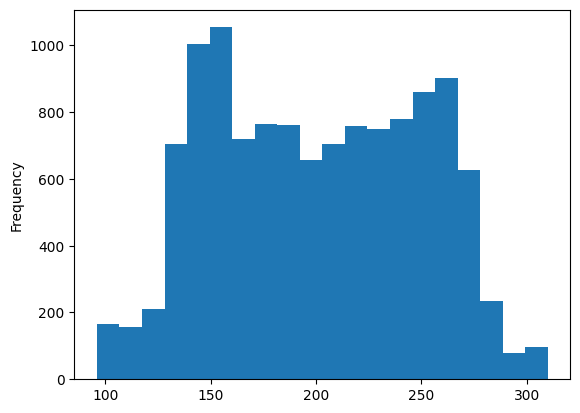

In [18]:
# Construa um histograma que ilustre a distribuição das médias de horas trabalhadas na empresa de todos os profissionais. Configure o gráfico com 20 barras para proporcionar uma representação visual detalhada.
df_hr_unique['average_montly_hours'].plot(kind='hist', bins=20)

In [19]:
# Qual departamento registrou a maior média de horas trabalhadas por funcionário e qual foi o número médio de projetos executados por funcionário nesse departamento?
df_hr_unique.groupby('department').agg({'average_montly_hours': 'mean', 'number_project': 'mean'}).sort_values(by='average_montly_hours', ascending=False).head(1)


,average_montly_hours,number_project
department,,
management,201.529817,3.837156


<Axes: title={'center': 'average_montly_hours'}, ylabel='salary'>

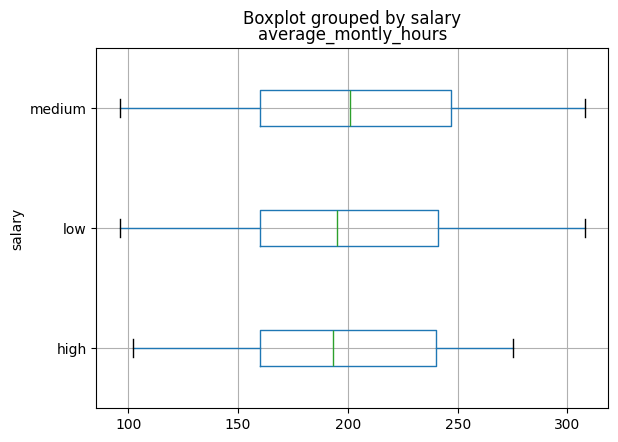

In [20]:
# Elabore um gráfico de boxplot, na horizontal e com cores diferentes, que represente a distribuição da média de horas trabalhadas de todos os profissionais do departamento TI, classificados de acordo com seu salário. Após isso, assinale a alternativa que melhor representa o resultado gerado.
df_hr_unique.where(df_hr_unique['department'] == 'IT').dropna().boxplot(column='average_montly_hours', by='salary', vert=False)

In [21]:
# Após a aplicação do algoritmo RandomForestClassifier, qual feature demonstra a maior importância no contexto dos dados analisados?
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns


In [24]:
importances, indices, features

(array([0.30349062, 0.11652969, 0.1422664 , 0.1604877 , 0.24997422,
        0.00597262, 0.00100644, 0.01195749, 0.00831481]),
 array([0, 4, 3, 2, 1, 7, 8, 5, 6]),
 Index(['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years', 'department', 'salary'],
       dtype='object'))

In [25]:
# Gere a pontuação (score) do modelo criado e selecione a opção que melhor reflete a aproximação desse score.
rf.score(X_test, y_test)

0.9785992217898832

Text(50.722222222222214, 0.5, 'Real')

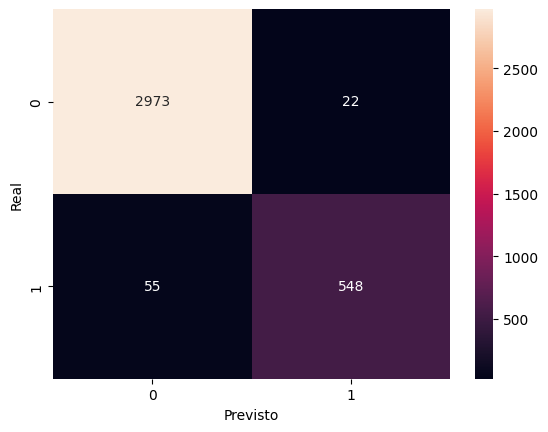

In [26]:
# Elabore a matriz de confusão para o modelo desenvolvido e, com base na análise dessa matriz e do relatório de classificação (classification_report), responda às demais questões: 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Previsto')
plt.ylabel('Real')


In [ ]:
# Qual foi a precisão associada foi classe não permaneceu?


In [ ]:
# Qual é a quantidade de registros que o modelo acertou para a classe que permaneceu na empresa?
